In [33]:
#created and edited by Samuel Phillips
#Cell line data : Assignment 5 Part 1

#imports for data, classes and more
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter, defaultdict
from scipy.cluster.hierarchy import single, complete, average, centroid, ward, fcluster, leaves_list, dendrogram
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

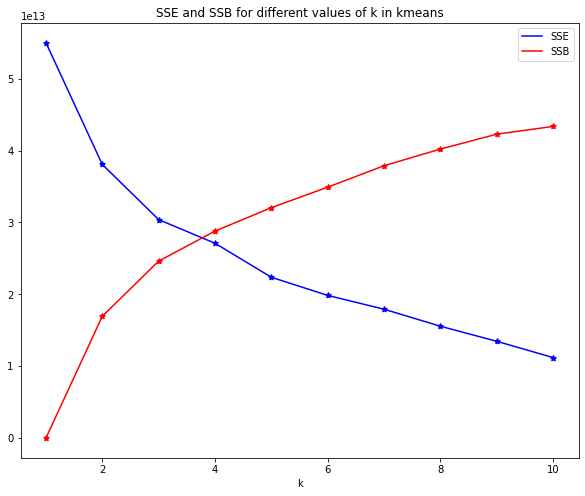

In [34]:
#Cell Line Data is read in
data = pd.read_csv('SCLC_study_output_filtered_2.csv')
df = pd.DataFrame(data).drop('Unnamed: 0',axis=1)

kSSE, kSSB = [], []
k = [1,2,3,4,5,6,7,8,9,10]

# --kmeans--
#kmeans sse
for x in k:
    #data is fitted
    k_means = cluster.KMeans(n_clusters=x).fit(df)
    
    #centroids are identified and then the lengths are gathered
    centroids = k_means.cluster_centers_
            
    #SSE kmeans
    kSSE.append(k_means.inertia_)
   
#kmeans ssb
for x in k:
    #data is fitted
    k_means = cluster.KMeans(n_clusters=x).fit(df)
    
    #centroids are identified and then the lengths are gathered
    centroids = k_means.cluster_centers_
    
    #SSB kmeans
    clustLabels = k_means.labels_
    ssbSum = 0.0
    for i in range(x):
        val = (np.where(clustLabels == i))[0]
        n = len(val)
        ssbSum += n * np.square(np.linalg.norm(centroids[i,:] - np.mean(df)))
    kSSB.append(ssbSum)  
   
# --kmeans clustering plot--
plt.figure(figsize=(10,8))

for i in range(0, len(kSSE)):
    plt.plot(k[i], kSSE[i], color='blue', marker=(5, 1))
    plt.plot(k[i], kSSB[i], color='red', marker=(5, 1))

plt.plot(k, kSSE, label='SSE', color='blue')
plt.plot(k, kSSB, label='SSB', color='red')
plt.xlabel('k')
plt.title('SSE and SSB for different values of k in kmeans')
plt.legend()

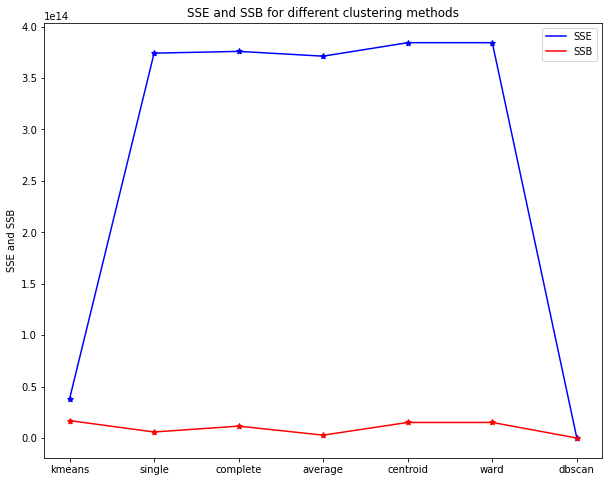

In [35]:
#kmeans, hierarchical and dbscan for k=2 w/ Cell Line Data
k = 2
SSE, SSB = [], []
newDF = pd.DataFrame(data)
newDF = list(newDF.loc[:, 'Unnamed: 0'])

# --kmeans--
k_means = cluster.KMeans(n_clusters=k).fit(df)
kmLabels = k_means.labels_
SSE.append(kSSE[1])
SSB.append(kSSB[1])

# --hierarchial single--
cSingle = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single').fit(df)
singleLabels = cSingle.labels_
sPred = cSingle.fit_predict(df)
clf = NearestCentroid()
clf.fit(df, sPred)
centroids = clf.centroids_
clustLabels = singleLabels
#sse
sseSum = 0.0
cSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    for w in range(len(val)):
        xVal = df.iloc[val[w]][0]
        sseSum += np.square(np.linalg.norm(centroids[i,:] - xVal))
SSE.append(sseSum)
#ssb
ssbSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    n = len(val)
    ssbSum += n * np.square(np.linalg.norm(centroids[i,:] - np.mean(df)))
SSB.append(ssbSum)  
   

# --hierarchial complete--
cComplete = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete').fit(df)
completeLabels = cComplete.labels_
cPred = cComplete.fit_predict(df)
clf = NearestCentroid()
clf.fit(df, cPred)
centroids = clf.centroids_
clustLabels = completeLabels
#sse
sseSum = 0.0
cSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    for w in range(len(val)):
        xVal = df.iloc[val[w]][0]
        sseSum += np.square(np.linalg.norm(centroids[i,:] - xVal))
SSE.append(sseSum)
#ssb
ssbSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    n = len(val)
    ssbSum += n * np.square(np.linalg.norm(centroids[i,:] - np.mean(df)))
SSB.append(ssbSum)  

# --hierarchial average--
cAverage = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average').fit(df)
averageLabels = cAverage.labels_
aPred = cAverage.fit_predict(df)
clf = NearestCentroid()
clf.fit(df, aPred)
centroids = clf.centroids_
clustLabels = averageLabels
#sse
sseSum = 0.0
cSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    for w in range(len(val)):
        xVal = df.iloc[val[w]][0]
        sseSum += np.square(np.linalg.norm(centroids[i,:] - xVal))
SSE.append(sseSum)
#ssb
ssbSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    n = len(val)
    ssbSum += n * np.square(np.linalg.norm(centroids[i,:] - np.mean(df)))
SSB.append(ssbSum)  

# --hierarchial centroid--
cCentroid = AgglomerativeClustering(n_clusters=k, affinity='euclidean').fit(df)
centroidLabels = cCentroid.labels_
pred = cCentroid.fit_predict(df)
clf = NearestCentroid()
clf.fit(df, pred)
centroids = clf.centroids_
clustLabels = centroidLabels
#sse
sseSum = 0.0
cSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    for w in range(len(val)):
        xVal = df.iloc[val[w]][0]
        sseSum += np.square(np.linalg.norm(centroids[i,:] - xVal))
SSE.append(sseSum)
#ssb
ssbSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    n = len(val)
    ssbSum += n * np.square(np.linalg.norm(centroids[i,:] - np.mean(df)))
SSB.append(ssbSum)

# --hierarchial ward--
cWard = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(df)
wardLabels = cWard.labels_
wPred = cWard.fit_predict(df)
clf = NearestCentroid()
clf.fit(df, wPred)
centroids = clf.centroids_
clustLabels = wardLabels
#sse
sseSum = 0.0
cSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    for w in range(len(val)):
        xVal = df.iloc[val[w]][0]
        sseSum += np.square(np.linalg.norm(centroids[i,:] - xVal))
SSE.append(sseSum)
#ssb
ssbSum = 0.0
for i in range(2):
    val = (np.where(clustLabels == i))[0]
    n = len(val)
    ssbSum += n * np.square(np.linalg.norm(centroids[i,:] - np.mean(df)))
SSB.append(ssbSum)

# --dbScan--
db = DBSCAN(eps=10, min_samples=5).fit(df)
dbLabels = db.labels_
dbPred = db.fit_predict(df)
#couldn't get dbscan or NearestCentroid to work?
#sse
SSE.append(0)
#ssb
SSB.append(0)

# --clustering plot--
plt.figure(figsize=(10,8))
k = ['kmeans', 'single', 'complete', 'average', 'centroid', 'ward', 'dbscan']

for i in range(0, len(SSB)):
    plt.plot(k[i], SSE[i], color='blue', marker=(5, 1))
    plt.plot(k[i], SSB[i], color='red', marker=(5, 1))

plt.plot(k, SSE, label='SSE', color='blue')
plt.plot(k, SSB, label='SSB', color='red')
plt.title('SSE and SSB for different clustering methods')
plt.ylabel('SSE and SSB')
plt.legend()

# --cluster results output file--
overallDF = {'kmeans' : kmLabels,
             'single' : singleLabels,
             'complete' : completeLabels,
             'average' : averageLabels,
             'centroid' : centroidLabels,
             'ward' : wardLabels,
             'dbscan' : dbLabels}
dfData = DataFrame(overallDF)
dfData.index = newDF
dfData.to_csv('cluster-results.csv')

In [38]:
print('My Conclusion: ')
print('Overall I believe with this large amount of data with many rows, kmeans, average and ward')
print('are the best modes of action for clustering.')
print('**Also side note: clustering is difficult')

My Conclusion: 
Overall I believe with this large amount of data with many rows, kmeans, average and ward
are the best modes of action for clustering.
**Also side note: clustering is difficult
